In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [83]:
today = pd.Timestamp.today().strftime('%Y-%m-%d')
data = yf.download(tickers='SPY', start='2012-03-11', end=today)

if isinstance(data.columns, pd.MultiIndex):
    data.columns = ['_'.join(col).strip() for col in data.columns.values]

data.columns = [col.replace('_SPY', '') for col in data.columns]

data = data.reset_index()

data['Name'] = 'SPY'

cols = ['Name'] + [col for col in data.columns if col != 'Name']
data = data[cols]

print(data.head())


[*********************100%***********************]  1 of 1 completed

  Name       Date       Close        High         Low        Open     Volume
0  SPY 2012-03-12  108.718246  108.860480  108.331035  108.694541  104003500
1  SPY 2012-03-13  110.678009  110.733330  109.121278  109.303036  184090500
2  SPY 2012-03-14  110.559425  110.986138  110.219625  110.709569  145163600
3  SPY 2012-03-15  111.199509  111.246920  110.440894  110.725373  165118500
4  SPY 2012-03-16  111.353500  111.496357  111.115394  111.401119  152893500


,Name,Date,Close,High,Low,Open,Volume,return,log_return
0,SPY,2012-03-12,108.718246,108.860480,108.331035,108.694541,104003500,NaN,NaN
1,SPY,2012-03-13,110.678009,110.733330,109.121278,109.303036,184090500,0.018026,0.017866
2,SPY,2012-03-14,110.559425,110.986138,110.219625,110.709569,145163600,-0.001071,-0.001072
3,SPY,2012-03-15,111.199509,111.246920,110.440894,110.725373,165118500,0.005789,0.005773
4,SPY,2012-03-16,111.353500,111.496357,111.115394,111.401119,152893500,0.001385,0.001384


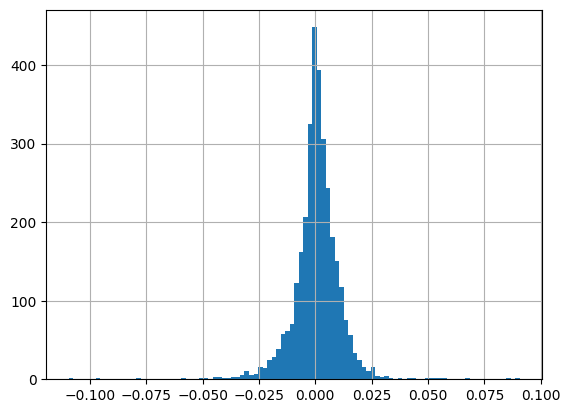

In [ ]:
data = data.ffill()  
data["return"] = data["Close"].pct_change()
data["return"].hist(bins=100)
data['log_return'] = np.log(data['return'] + 1)
display(data.head())


In [94]:
mean = data['return'].mean()
std = data['return'].std()
print(mean, std)

0.0005593140630737597 0.010405364519445397


np.float64(0.010437039734118653)

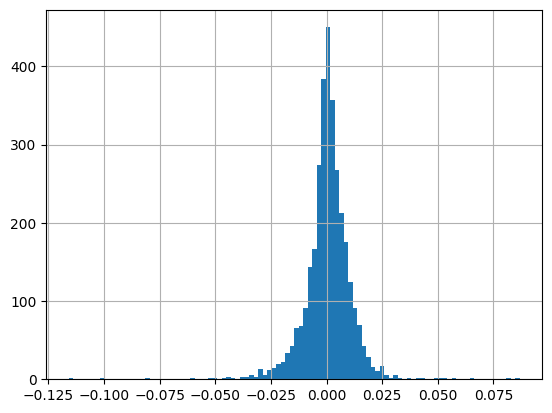

In [95]:
data['log_return'] = np.log(data['return'] + 1)
data.head()
data['log_return'].hist(bins=100)
data['log_return'].mean()
data['log_return'].std()



In [87]:
from scipy.stats import norm


In [96]:
x_list = np.linspace(
    data['return'].min(),
    data['return'].max(),
    100)

y_list = norm.pdf(x_list, loc=data['return'].mean(), scale=data['return'].std())


<Axes: >

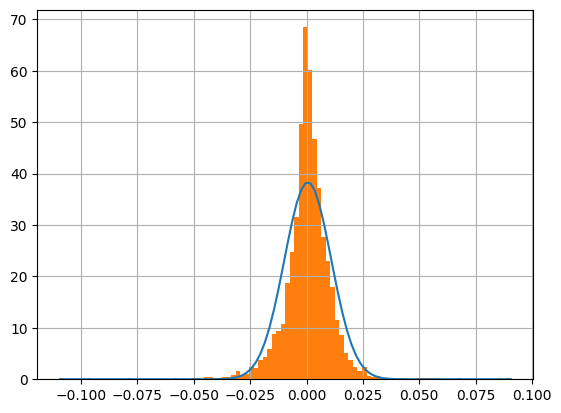

In [97]:
plt.plot(x_list, y_list)
data['return'].hist(bins=100, density=True)

((array([-3.52490216, -3.28266489, -3.14878868, ...,  3.14878868,
          3.28266489,  3.52490216]),
  array([-0.10942396, -0.09567723, -0.07809461, ...,  0.06716577,
          0.08548647,  0.09060353])),
 (np.float64(0.009845747128453196),
  np.float64(0.0005593140630737586),
  np.float64(0.945440812297237)))

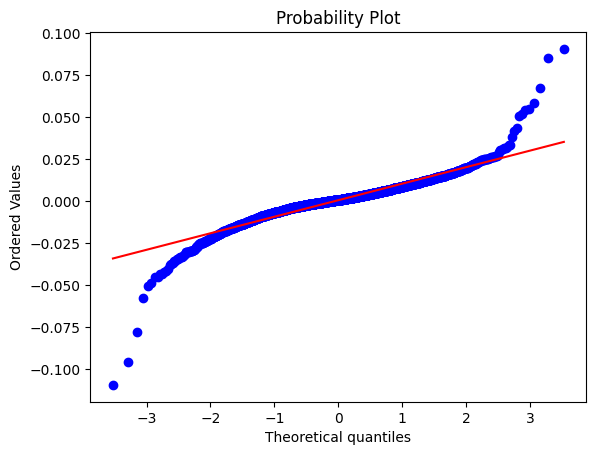

In [98]:
from scipy.stats import probplot
probplot(data['return'].dropna(), dist='norm', fit=True, plot=plt)


# T distribution

<Axes: >

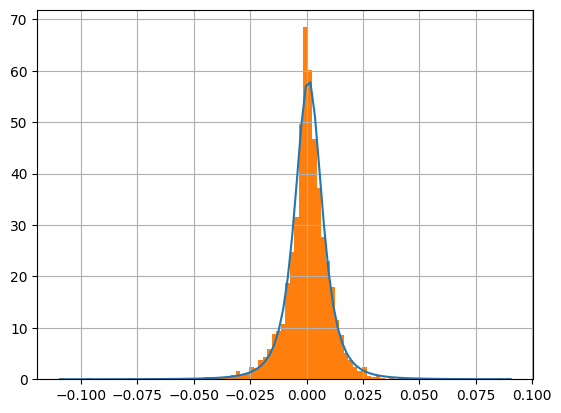

In [100]:
from scipy.stats import t


x_list = np.linspace(
    data['return'].min(),
    data['return'].max(),
    100)

params = t.fit(data['return'].dropna())
params
df, loc, scale = params
y_list = t.pdf(x_list, df, loc, scale)
plt.plot(x_list, y_list)
data['return'].hist(bins=100, density=True)



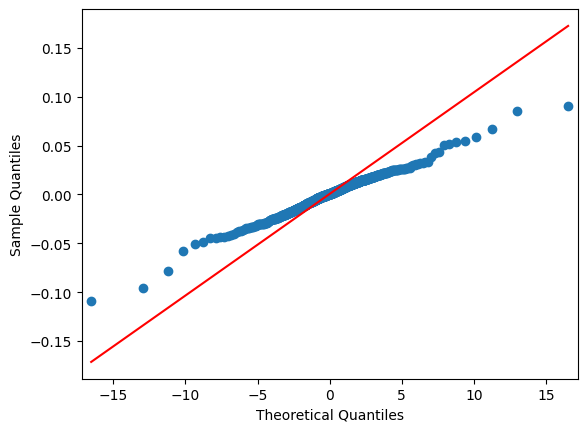

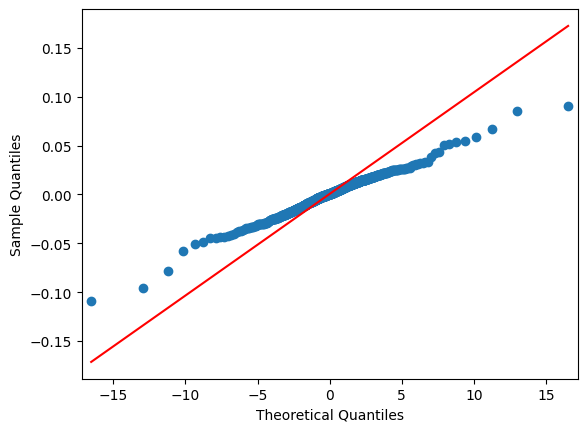

In [108]:
import statsmodels.api as sm

class myt:
  def __init__(self, df):
    self.df = df
  
  def fit(self, x):
    return t.fit(x)
  
  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)
  
sm.qqplot(data['return'].dropna(), dist=myt(df), line='s')

degree of freedom: 2.875942203177887


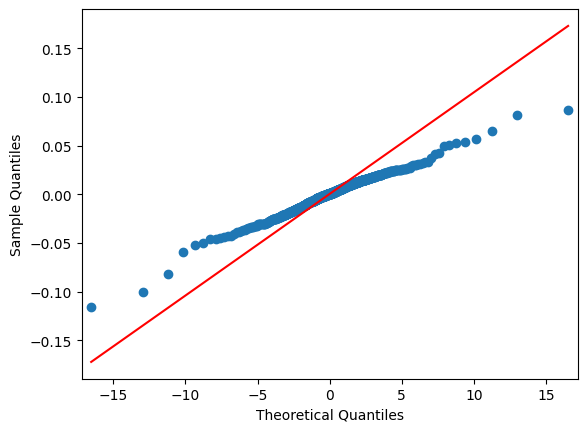

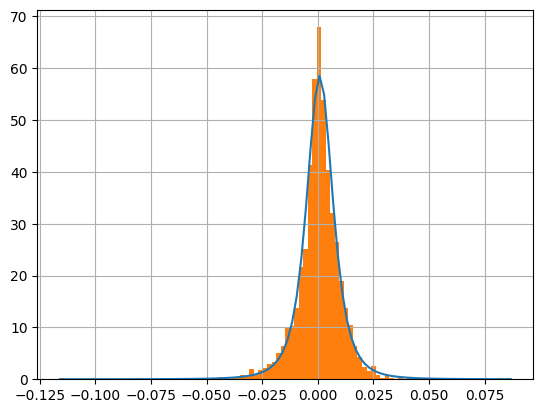

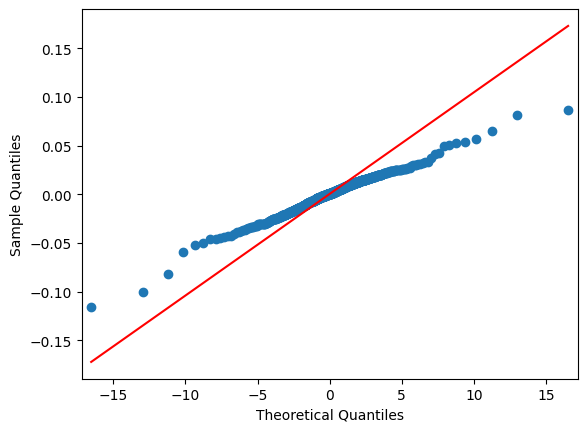

In [109]:
x_list = np.linspace(
    data['log_return'].min(),
    data['log_return'].max(),
    100)
params = t.fit(data['log_return'].dropna())
df, loc, scale = params
print(f"degree of freedom: {df}")
y_list = t.pdf(x_list, df, loc, scale)
plt.plot(x_list, y_list)
data['log_return'].hist(bins=100, density=True)
sm.qqplot(data['log_return'].dropna(), dist=myt(df), line='s')


In [112]:
data['return'].skew()
data['return'].kurtosis()
print(f"skewness: {data['return'].skew()}")
print(f"kurtosis: {data['return'].kurtosis()}")

skewness: -0.5411499222124837
kurtosis: 12.9445197256818


<Axes: title={'center': 'SPY return'}>

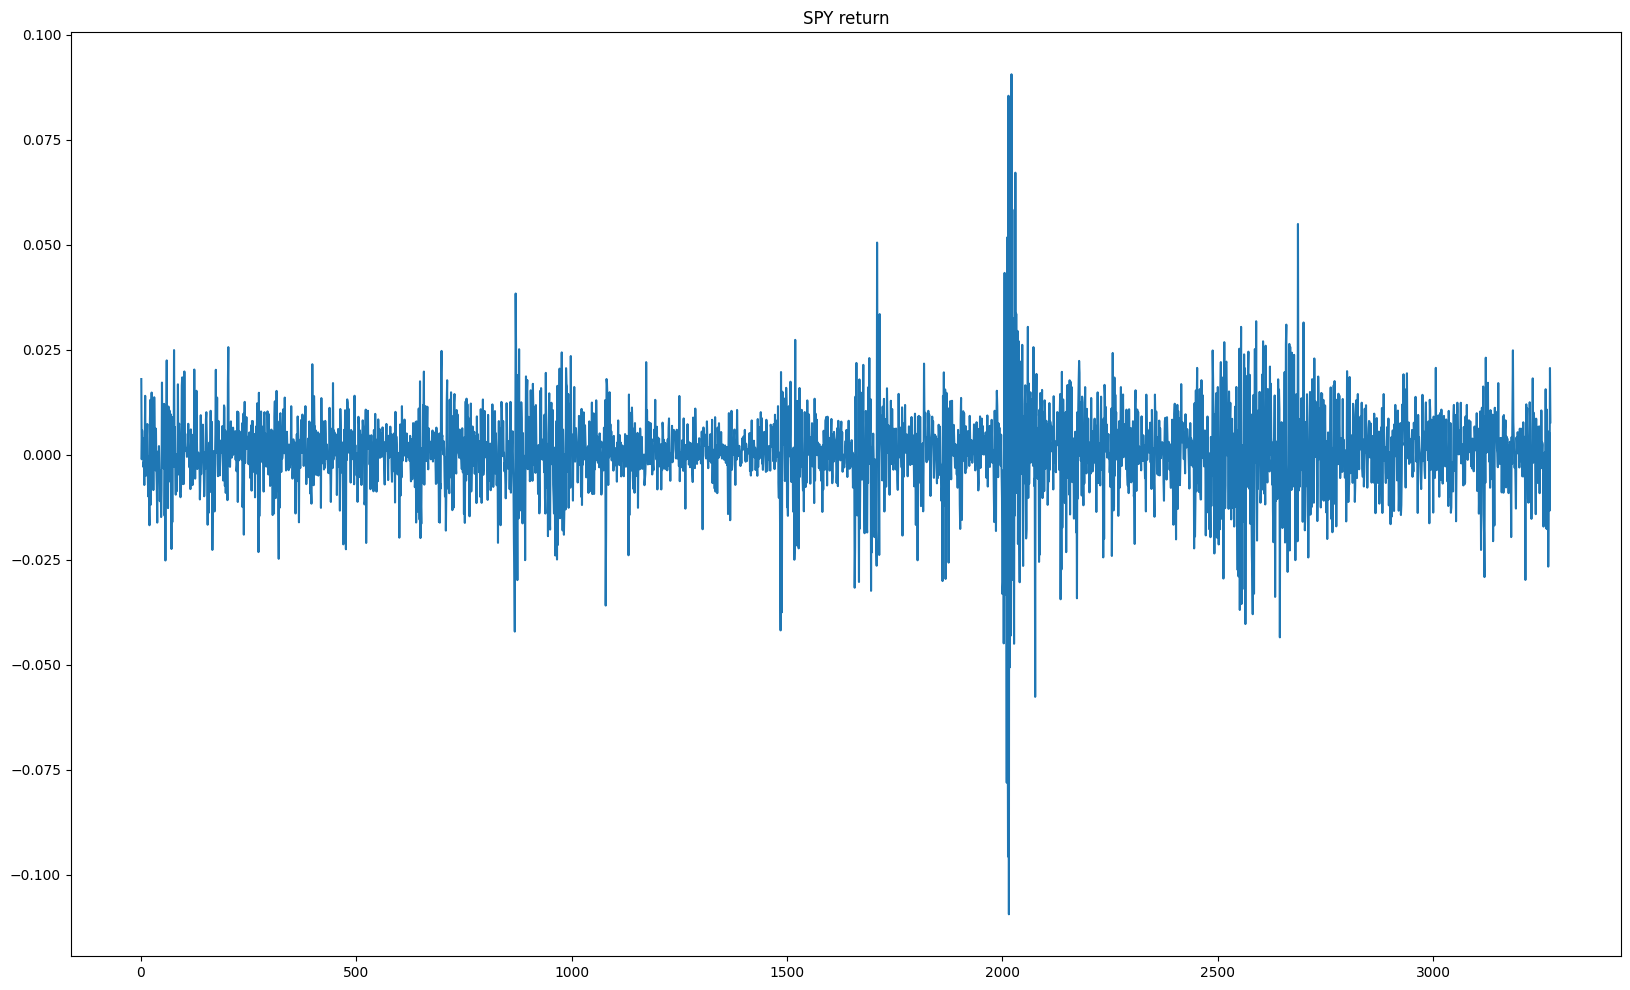

In [ ]:
plt.title('SPY return')
data['return'].plot(figsize=(20,12))